Objective:
Use historical MLB player statistics to identify key performance indicators (KPIs) that predict player success. Develop a predictive model to rank players based on their expected contribution to team wins.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('2024 batters.csv')

# Preview the data
df.head()
df.info()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"McCutchen, Andrew",457705,2024,515,25.8,11.3,0.325,0.327,31.9,12.0,36.9,99.424963,93.831123,28.9,42.0
1,"Turner, Justin",457759,2024,539,17.6,10.9,0.327,0.328,40.1,4.6,32.5,96.702342,92.434681,17.0,45.4
2,"Santana, Carlos",467793,2024,594,16.7,10.9,0.326,0.330,30.9,7.3,39.9,99.506124,94.004168,23.3,43.3
3,"Goldschmidt, Paul",502671,2024,654,26.5,7.2,0.310,0.329,34.3,10.7,49.6,101.892584,95.666428,27.4,47.7
4,"Altuve, Jose",514888,2024,682,17.4,6.9,0.344,0.316,35.4,6.5,31.2,97.323673,92.693763,22.1,51.5


In [6]:
#data cleaning
df.isnull().sum()
#no missing data

,0
"last_name, first_name",0
player_id,0
year,0
pa,0
k_percent,0
bb_percent,0
woba,0
xwoba,0
sweet_spot_percent,0
barrel_batted_rate,0


In [7]:
df.rename(columns={
    'k_percent': 'Strikeout_Rate',
    'bb_percent': 'Walk_Rate',
    'woba': 'WOBA',
    'xwoba': 'Expected_WOBA',
    'sweet_spot_percent': 'Sweet_Spot_Rate',
    'barrel_batted_rate': 'Barrel_Rate',
    'hard_hit_percent': 'Hard_Hit_Rate',
    'avg_best_speed': 'Average_Best_Speed',
    'avg_hyper_speed': 'Average_Hyper_Speed',
    'whiff_percent': 'Whiff_Rate',
    'swing_percent': 'Swing_Rate'
}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  129 non-null    object 
 1   player_id              129 non-null    int64  
 2   year                   129 non-null    int64  
 3   pa                     129 non-null    int64  
 4   Strikeout_Rate         129 non-null    float64
 5   Walk_Rate              129 non-null    float64
 6   WOBA                   129 non-null    float64
 7   Expected_WOBA          129 non-null    float64
 8   Sweet_Spot_Rate        129 non-null    float64
 9   Barrel_Rate            129 non-null    float64
 10  Hard_Hit_Rate          129 non-null    float64
 11  Average_Best_Speed     129 non-null    float64
 12  Average_Hyper_Speed    129 non-null    float64
 13  Whiff_Rate             129 non-null    float64
 14  Swing_Rate             129 non-null    float64
dtypes: flo

In [10]:
df.head()

,"last_name, first_name",player_id,year,pa,Strikeout_Rate,Walk_Rate,WOBA,Expected_WOBA,Sweet_Spot_Rate,Barrel_Rate,Hard_Hit_Rate,Average_Best_Speed,Average_Hyper_Speed,Whiff_Rate,Swing_Rate
0,"McCutchen, Andrew",457705,2024,515,25.8,11.3,0.325,0.327,31.9,12.0,36.9,99.424963,93.831123,28.9,42.0
1,"Turner, Justin",457759,2024,539,17.6,10.9,0.327,0.328,40.1,4.6,32.5,96.702342,92.434681,17.0,45.4
2,"Santana, Carlos",467793,2024,594,16.7,10.9,0.326,0.330,30.9,7.3,39.9,99.506124,94.004168,23.3,43.3
3,"Goldschmidt, Paul",502671,2024,654,26.5,7.2,0.310,0.329,34.3,10.7,49.6,101.892584,95.666428,27.4,47.7
4,"Altuve, Jose",514888,2024,682,17.4,6.9,0.344,0.316,35.4,6.5,31.2,97.323673,92.693763,22.1,51.5


In [21]:
#exploratory data analysis
df.describe().round(0)

,player_id,year,pa,Strikeout_Rate,Walk_Rate,WOBA,Expected_WOBA,Sweet_Spot_Rate,Barrel_Rate,Hard_Hit_Rate,Average_Best_Speed,Average_Hyper_Speed,Whiff_Rate,Swing_Rate
count,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0
mean,643345.0,2024.0,611.0,21.0,9.0,0.0,0.0,34.0,9.0,42.0,101.0,95.0,24.0,48.0
std,51255.0,0.0,60.0,5.0,3.0,0.0,0.0,3.0,4.0,7.0,3.0,2.0,6.0,5.0
min,457705.0,2024.0,507.0,4.0,3.0,0.0,0.0,27.0,1.0,20.0,94.0,91.0,7.0,37.0
25%,621566.0,2024.0,561.0,17.0,7.0,0.0,0.0,32.0,6.0,37.0,99.0,94.0,20.0,44.0
50%,663993.0,2024.0,619.0,21.0,8.0,0.0,0.0,34.0,9.0,42.0,100.0,94.0,24.0,48.0
75%,676475.0,2024.0,654.0,25.0,11.0,0.0,0.0,36.0,12.0,47.0,102.0,96.0,29.0,50.0
max,701538.0,2024.0,735.0,34.0,19.0,0.0,0.0,43.0,27.0,61.0,107.0,99.0,36.0,62.0


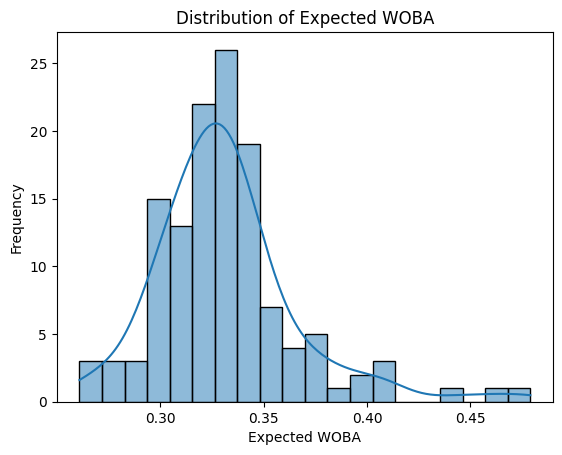

In [14]:
#visualizations
#Distribution of Quality of Contact Metrics:

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Expected_WOBA'], kde=True, bins=20)
plt.title('Distribution of Expected WOBA')
plt.xlabel('Expected WOBA')
plt.ylabel('Frequency')
plt.show()

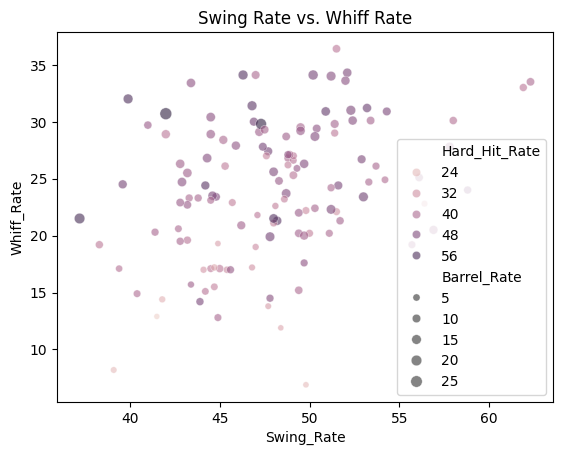

In [15]:
#compare Swing and Whiff Rates
sns.scatterplot(x='Swing_Rate', y='Whiff_Rate', data=df, hue='Hard_Hit_Rate', size='Barrel_Rate', alpha=0.6)
plt.title('Swing Rate vs. Whiff Rate')
plt.show()

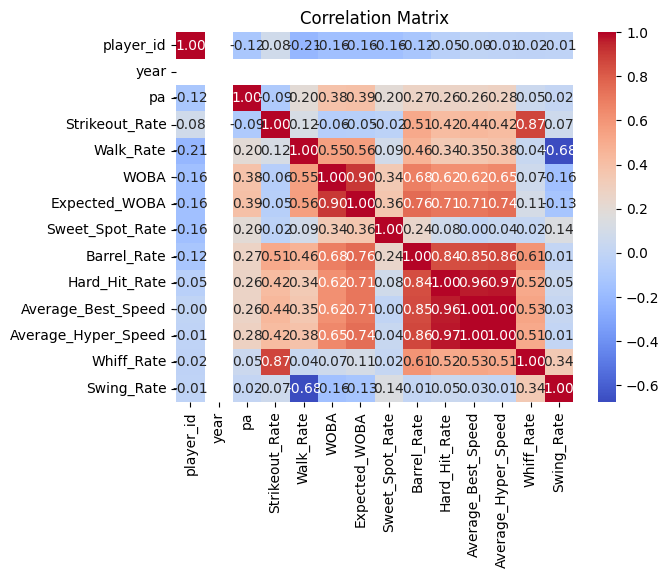

In [19]:
#correlations
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
#top performers by expected woba
top_woba = df.sort_values('Expected_WOBA', ascending=False).head(10)
top_woba

,"last_name, first_name",player_id,year,pa,Strikeout_Rate,Walk_Rate,WOBA,Expected_WOBA,Sweet_Spot_Rate,Barrel_Rate,Hard_Hit_Rate,Average_Best_Speed,Average_Hyper_Speed,Whiff_Rate,Swing_Rate
15,"Judge, Aaron",592450,2024,704,24.3,18.9,0.476,0.479,40.8,26.9,61.0,107.200436,99.103702,30.7,42.0
70,"Soto, Juan",665742,2024,713,16.7,18.1,0.421,0.462,35.4,19.7,57.0,105.650124,97.994705,21.5,37.2
53,"Ohtani, Shohei",660271,2024,731,22.2,11.1,0.431,0.442,37.8,21.5,60.1,106.727792,98.772122,29.8,47.3
89,"Alvarez, Yordan",670541,2024,635,15.0,10.9,0.402,0.411,35.4,14.5,49.7,104.097105,96.703520,19.9,47.8
69,"Guerrero Jr., Vladimir",665489,2024,697,13.8,10.3,0.398,0.408,35.1,13.7,54.9,105.663721,97.649346,21.5,48.0
99,"Witt Jr., Bobby",677951,2024,709,15.0,8.0,0.410,0.407,35.7,14.3,48.3,103.972880,96.499868,22.3,51.2
7,"Ozuna, Marcell",542303,2024,688,24.7,10.8,0.395,0.402,40.2,15.5,53.5,103.370699,96.509069,31.4,46.8
23,"Marte, Ketel",606466,2024,583,18.2,11.1,0.391,0.392,33.7,12.3,53.8,103.991137,96.920444,21.3,48.2
28,"Seager, Corey",608369,2024,533,18.0,9.9,0.365,0.390,38.6,15.2,50.7,103.274395,96.157523,23.4,53.0
78,"Rooker Jr., Brent",667670,2024,614,28.8,9.6,0.392,0.380,38.3,16.6,49.6,103.252385,96.193453,34.1,50.2


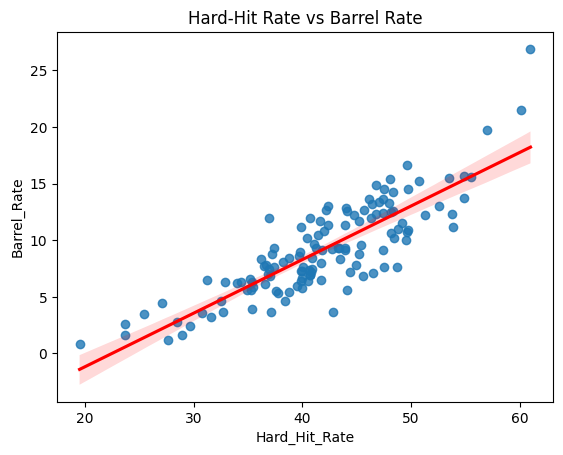

In [26]:
#relationship between hard-hit rate and barrels
sns.regplot(x='Hard_Hit_Rate', y='Barrel_Rate', data=df, line_kws={"color": "red"})
plt.title('Hard-Hit Rate vs Barrel Rate')
plt.show()

In [30]:
#identify underperformers
df['WOBA_Diff'] = df['Expected_WOBA'] - df['WOBA']
df.sort_values('WOBA_Diff', ascending=False).head(10)  # Underperformers

,"last_name, first_name",player_id,year,pa,Strikeout_Rate,Walk_Rate,WOBA,Expected_WOBA,Sweet_Spot_Rate,Barrel_Rate,Hard_Hit_Rate,Average_Best_Speed,Average_Hyper_Speed,Whiff_Rate,Swing_Rate,WOBA_Diff
70,"Soto, Juan",665742,2024,713,16.7,18.1,0.421,0.462,35.4,19.7,57.0,105.650124,97.994705,21.5,37.2,0.041
75,"Morel, Christopher",666624,2024,611,26.0,10.0,0.280,0.316,27.6,10.2,40.4,101.221222,94.784091,34.1,47.0,0.036
93,"Garcia, Maikel",672580,2024,626,16.5,6.7,0.270,0.300,34.1,3.7,42.8,100.050927,94.394922,15.7,43.4,0.030
54,"Sánchez, Jesús",660821,2024,537,26.1,7.6,0.317,0.343,31.8,12.2,51.3,104.556001,96.923820,31.2,53.2,0.026
28,"Seager, Corey",608369,2024,533,18.0,9.9,0.365,0.390,38.6,15.2,50.7,103.274395,96.157523,23.4,53.0,0.025
6,"Perez, Salvador",521692,2024,652,19.8,6.7,0.335,0.360,39.4,12.2,44.8,101.856276,95.341857,27.8,57.8,0.025
9,"Springer III, George",543807,2024,614,18.7,9.8,0.298,0.322,29.2,9.3,37.4,99.896868,94.046929,25.3,49.1,0.024
98,"Rodríguez, Julio",677594,2024,613,25.4,6.2,0.321,0.344,33.2,10.2,48.4,103.553688,96.325344,30.9,54.3,0.023
60,"Raleigh, Cal",663728,2024,628,28.0,11.1,0.323,0.346,35.6,15.4,48.1,102.032072,95.508789,31.0,52.3,0.023
36,"Cronenworth, Jake",630105,2024,656,18.0,9.3,0.315,0.335,35.4,7.8,36.7,99.527561,93.904134,17.1,45.0,0.020


In [31]:
#identify overperformers
df['WOBA_Diff'] = df['Expected_WOBA'] - df['WOBA']
df.sort_values('WOBA_Diff').head(10)  # Overperformers

,"last_name, first_name",player_id,year,pa,Strikeout_Rate,Walk_Rate,WOBA,Expected_WOBA,Sweet_Spot_Rate,Barrel_Rate,Hard_Hit_Rate,Average_Best_Speed,Average_Hyper_Speed,Whiff_Rate,Swing_Rate,WOBA_Diff
56,"Varsho, Daulton",662139,2024,513,26.7,9.4,0.304,0.261,30.2,6.2,34.0,98.537584,93.276618,27.0,47.6,-0.043
100,"Tovar, Ezequiel",678662,2024,695,28.8,3.3,0.324,0.289,38.5,9.0,39.8,99.306486,93.964016,33.5,62.3,-0.035
26,"Ramírez, José",608070,2024,682,12.0,7.9,0.364,0.329,34.0,8.6,39.7,99.642954,93.982320,15.2,49.4,-0.035
25,"Turner, Trea",607208,2024,539,18.2,5.0,0.349,0.318,30.9,6.9,40.7,99.706063,94.073108,26.1,53.7,-0.031
4,"Altuve, Jose",514888,2024,682,17.4,6.9,0.344,0.316,35.4,6.5,31.2,97.323673,92.693763,22.1,51.5,-0.028
10,"Harper, Bryce",547180,2024,631,21.9,12.0,0.380,0.357,36.1,10.6,48.2,102.531835,95.638829,26.7,52.9,-0.023
90,"Paredes, Isaac",670623,2024,641,16.4,11.9,0.327,0.304,37.0,4.5,27.1,95.875583,91.952620,17.2,44.7,-0.023
123,"Winn, Masyn",691026,2024,637,17.1,6.4,0.315,0.293,33.5,3.7,32.7,98.144268,93.085870,19.0,47.0,-0.022
37,"Bellinger, Cody",641355,2024,569,15.6,7.9,0.322,0.301,32.9,6.3,32.9,97.314029,92.768351,22.2,49.8,-0.021
109,"De La Cruz, Elly",682829,2024,696,31.3,9.9,0.349,0.328,35.7,12.7,45.7,102.955354,95.902724,33.4,43.4,-0.021
